In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Reading the distance data from text file into dataframe X
file_path = 'test222DataMin.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

data = [list(map(int, line.strip().split())) for line in lines]

X = pd.DataFrame(data)

print(X.shape)


(70, 1892)


In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891
0,350,227,384,287,344,289,393,331,359,341,...,456,224,386,225,455,220,388,222,436,222
1,436,301,380,386,410,348,467,394,475,383,...,437,309,418,307,438,304,422,303,502,290
2,308,405,357,391,390,360,371,466,364,451,...,444,225,384,163,442,222,383,165,421,221
3,436,306,339,388,350,364,437,406,436,397,...,423,304,410,307,425,301,414,303,511,286
4,264,238,297,298,270,302,289,339,262,359,...,451,221,396,174,449,219,395,174,428,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,410,352,386,333,396,362,419,322,417,331,...,218,192,151,293,216,193,155,286,213,262
66,430,370,357,402,346,385,393,474,381,455,...,122,213,70,153,122,209,72,153,125,216
67,128,285,185,343,97,326,181,356,73,326,...,125,145,128,159,124,146,127,159,120,221
68,157,292,198,335,162,332,201,345,178,346,...,171,175,138,273,169,176,140,268,142,237


In [4]:
#classification dataFrame Y
data=[1]*30+[0]*40
Y=pd.DataFrame(data)
print(Y)


    0
0   1
1   1
2   1
3   1
4   1
.. ..
65  0
66  0
67  0
68  0
69  0

[70 rows x 1 columns]


In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891
0,350,227,384,287,344,289,393,331,359,341,...,456,224,386,225,455,220,388,222,436,222
1,436,301,380,386,410,348,467,394,475,383,...,437,309,418,307,438,304,422,303,502,290
2,308,405,357,391,390,360,371,466,364,451,...,444,225,384,163,442,222,383,165,421,221
3,436,306,339,388,350,364,437,406,436,397,...,423,304,410,307,425,301,414,303,511,286
4,264,238,297,298,270,302,289,339,262,359,...,451,221,396,174,449,219,395,174,428,218


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 1892 entries, 0 to 1891
dtypes: int64(1892)
memory usage: 1.0 MB


In [7]:
import numpy as np
np.array(X)

array([[350, 227, 384, ..., 222, 436, 222],
       [436, 301, 380, ..., 303, 502, 290],
       [308, 405, 357, ..., 165, 421, 221],
       ...,
       [128, 285, 185, ..., 159, 120, 221],
       [157, 292, 198, ..., 268, 142, 237],
       [156, 368, 147, ..., 221, 169, 218]], dtype=int64)

In [8]:
#Decision Tree Classifier
cv = LeaveOneOut()
predictions = []

model = DecisionTreeClassifier()
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])
print(predictions)
accuracy = accuracy_score(Y, predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
Accuracy: 0.8857142857142857


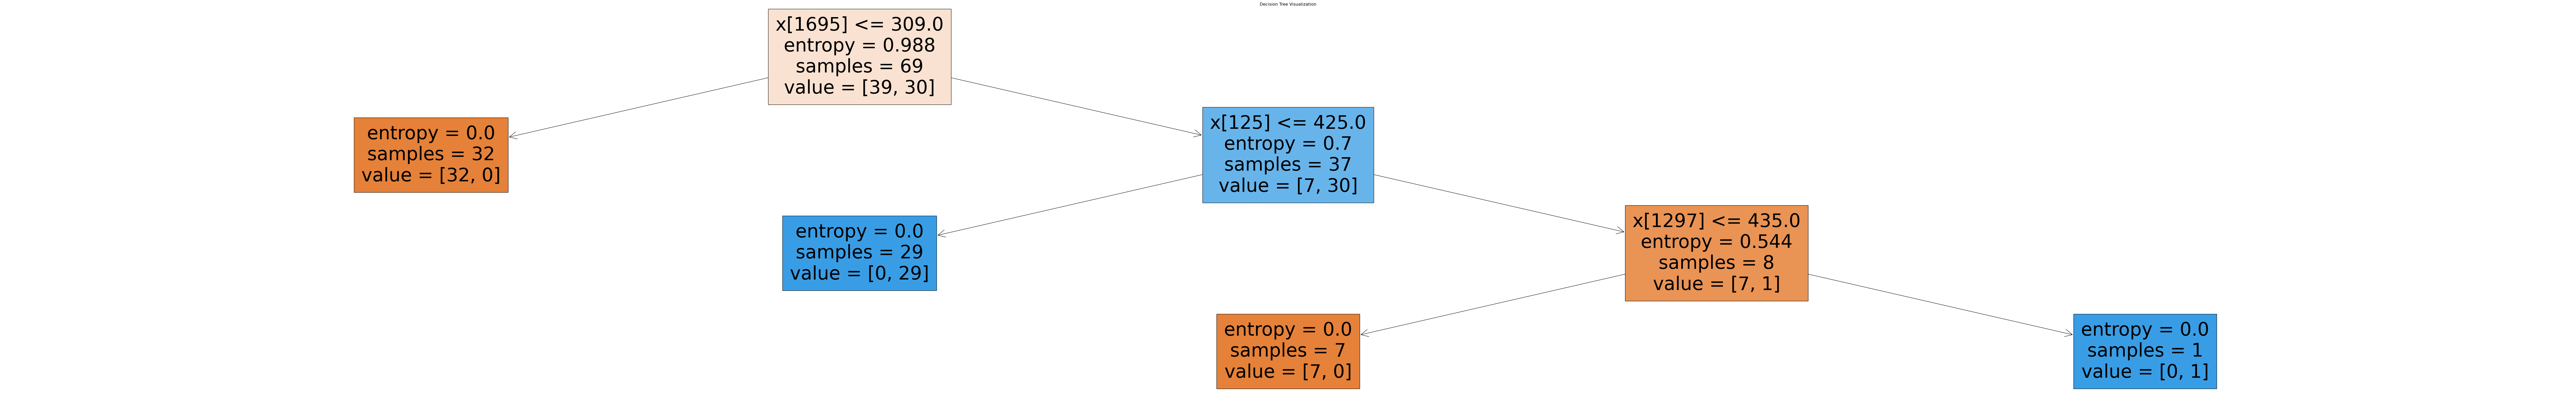

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming x_train and y_train are your training data
# Instantiate the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(130, 20))
plot_tree(classifier, filled=True )
plt.title("Decision Tree Visualization")
plt.show()


In [10]:
#LinearSVC

cv = LeaveOneOut()
predictions = []

model = LinearSVC(max_iter=10000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9571428571428572


In [11]:
#Logistic Regression

cv = LeaveOneOut()
predictions = []

model = LogisticRegression(max_iter=1000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9428571428571428


In [12]:
#voting based model
cv = LeaveOneOut()
predictions = []

model1 = LogisticRegression(random_state=1, solver='newton-cg', max_iter=1000)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape target variable
    y_train = y_train.values.ravel()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(Y.values.ravel(), predictions)

print(f"Accuracy: {accuracy}")


[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9285714285714286


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
cv = LeaveOneOut()
predictions = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")


[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9571428571428572
